In [1]:
import csv
import glob
import pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [5]:
def convert_raw_data_to_dataframe_new(filelist):
    dataframe = pandas.DataFrame(columns = ['run_number', 'task_number', 'memory_steps', 'gscore', 'sscore'])
    run_number = 0
    for file in filelist:
        with open(file) as csvfile:
            reader = csv.DictReader(csvfile)
            for row in reader:
                task_number = row[None][0]
                memory_steps = row[None].count('cm')
                sscore = row[None][-2]
                gscore = row[None][-3]
                new_row = {'run_number': int(run_number), 'task_number': int(task_number), 'memory_steps': int(memory_steps), 'gscore':int(gscore), 'sscore': int(sscore)}
                dataframe = dataframe.append(new_row, ignore_index = True)
        run_number = run_number + 1
    dataframe['run_number'] = pandas.to_numeric(dataframe['run_number'])
    dataframe['task_number'] = pandas.to_numeric(dataframe['task_number'])
    dataframe['memory_steps'] = pandas.to_numeric(dataframe['memory_steps'])
    dataframe['gscore'] = pandas.to_numeric(dataframe['gscore'])
    dataframe['sscore'] = pandas.to_numeric(dataframe['sscore'])
    
    return dataframe

In [21]:
def plot_interactive_learning_results_new(dataset):
    sns.set(rc={'figure.figsize':(18,10)}, font="Inconsolata",font_scale=2, style="ticks")
    fig, ax = plt.subplots()
    sns.barplot(x=dataset.task_number, y=dataset.memory_steps, color="cornflowerblue", ax=ax, alpha=0.5, errcolor='steelblue', label = "# store")
    ax2 = ax.twinx()
    sns.lineplot(x=dataset.task_number, y=dataset.gscore, color="mediumorchid",  ax=ax2, label = "generality")
    sns.lineplot(x=dataset.task_number, y=dataset.sscore, color="darkseagreen",  ax=ax2, label = "specificity")
    count = "averaged over " + str(dataset['run_number'].nunique()) + " runs"
    #plt.text(3.5, 5.8,  count, horizontalalignment='left', size='small', color='black', weight='semibold')
    ax.set(xlabel='# inform lesson', ylabel='# store')
    ax2.set(ylabel='test score')
    temp = ax.xaxis.get_ticklabels()
    temp = list(set(temp) - set(temp[::5]))
    for label in temp:
        label.set_visible(False)
    ax.legend(bbox_to_anchor=(0.8, 0.4), loc=2, borderaxespad=0., fontsize=20)
    ax2.legend(bbox_to_anchor=(0.8, 0.3), loc=2, borderaxespad=0., fontsize=20)



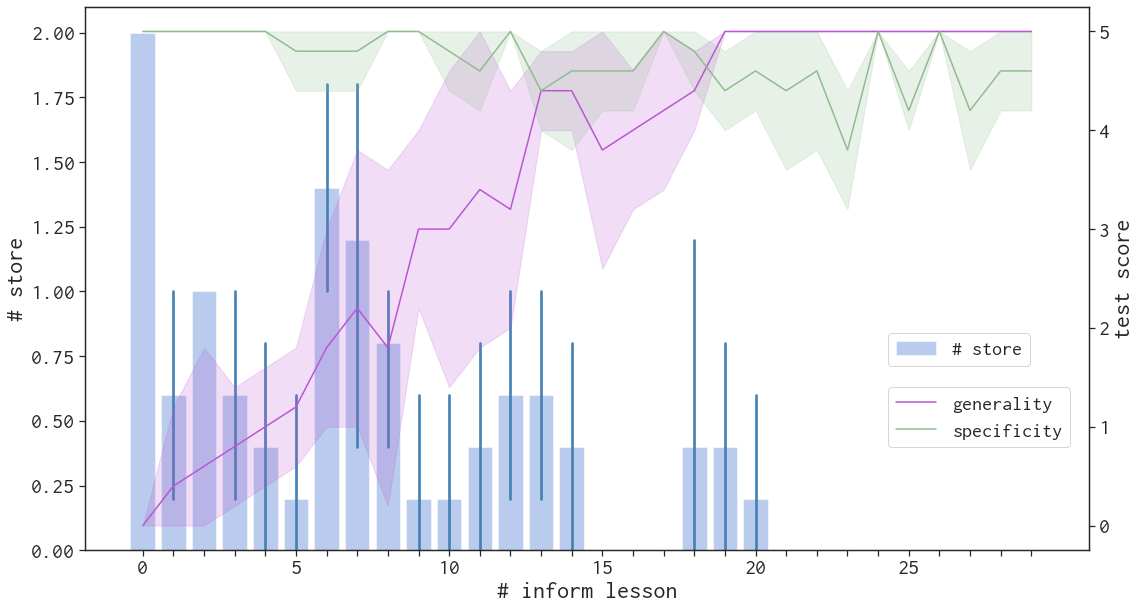

In [23]:
filelist = (glob.glob("data/*.csv"))
behind_dataset = convert_raw_data_to_dataframe_new(filelist)
plot_interactive_learning_results_new(behind_dataset)